In [43]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [44]:
key = jax.random.PRNGKey(42)
key1, key2, key3 = jax.random.split(key, 3)
def make_data(key, n_samples = 500, mean = jnp.array([1, 1]), sigma = jnp.array([1, 1])):
    return mean + sigma * jax.random.normal(key, shape = (n_samples,2))

def build_binary_dataset(
          key,
          n_samples = 500,
          mean0 = jnp.array([0, -.1]),
          mean1 = jnp.array([.07, .2]),
          sigma0 = jnp.array([.01, 1]),
          sigma1 = jnp.array([.01, 1])
):
    key1, key2 = jax.random.split(key)
    y0 = jnp.zeros([n_samples,1]) 
    y1 = jnp.ones([n_samples,1]) 
    X0 = jnp.hstack([
         make_data(key1, n_samples, mean=mean0, sigma=sigma0), 
         y0
        ])
    X1 = jnp.hstack([
        make_data(key1, n_samples, mean=mean1, sigma=sigma1),
        y1
    ])

    return jnp.vstack([X0, X1])


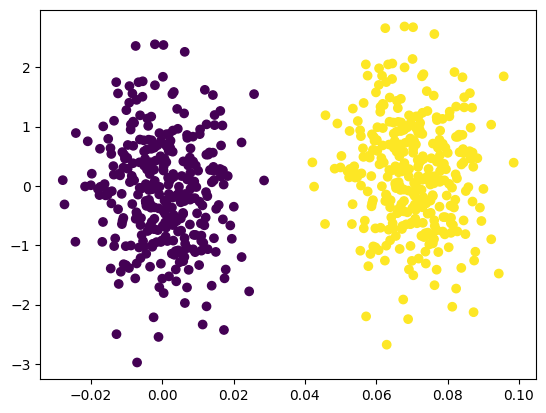

In [45]:
data = build_binary_dataset(key1, n_samples=320)
plt.scatter(data[:,0], data[:,1], c=data[:,2])

In [76]:
def build_xor_data(key, centers = jnp.array([
            [-1, -1],
            [1, -1],
            [-1, 1],
            [1, 1]
        ]), noise = .3, n_samples = 100):
    cluster_sample_n = n_samples // 4
    cluster_labels = jnp.array([0, 1, 1, 0])
    X = []
    y = []
    for i in range(4):
        subkey1, key = jax.random.split(key)

        cluster_sample = centers[i] + jax.random.normal(
            subkey1, (cluster_sample_n,2)
        ) * noise
        X.append(cluster_sample)
        y.append(jnp.full(cluster_sample_n, cluster_labels[i]))

    X = jnp.vstack(X)
    y = jnp.concat(y)

    subkey, key = jax.random.split(key)
    perm = jax.random.permutation(subkey, n_samples)
    X = X[perm]
    y = y[perm]
    return X, y


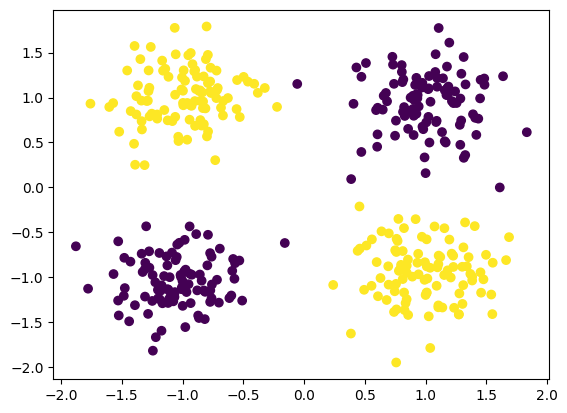

In [77]:
plt.scatter(X[:,0], X[:,1], c=y)

In [78]:
from sklearn.cluster import k_means

In [ ]:
def random_poision(key, y, alpha):
    n = int(y.shape[0] * alpha)
    poision_idx = jax.random.permutation(key, y.shape[0])[:n]
    y = y.at[poision_idx].set(jnp.invert(y[poision_idx].astype(bool)).astype(int))
    return y

Array([0, 1, 1, 1, 1], dtype=int32)

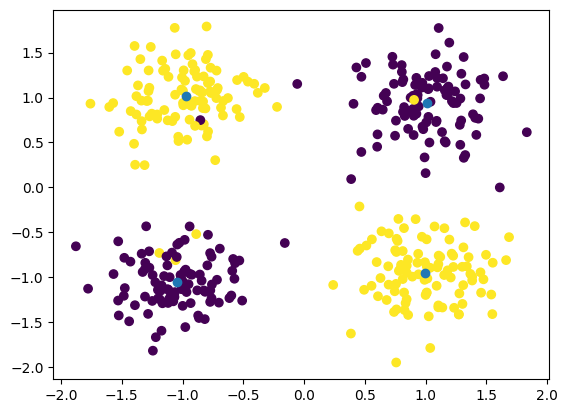

In [131]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(centroids[:,0], centroids[:,1])

In [100]:
centroids[1] #+ jnp.array([-1, 1])

array([-0.9737356,  1.0141267], dtype=float32)

In [116]:
data = make_data(key3, 5, mean=centroids[2] + jnp.array([1, 1]), sigma=jnp.array([.3,.3]))

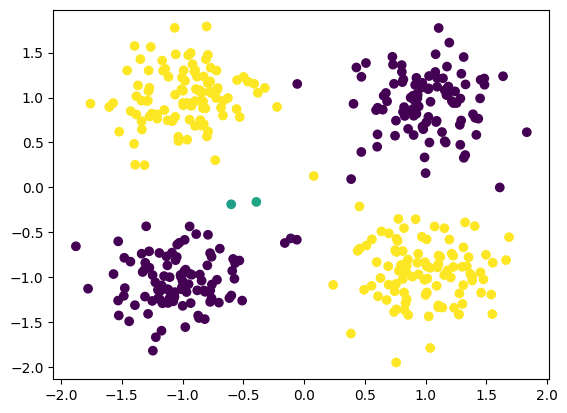

In [117]:
plt.scatter(data[:,0], data[:,1], c=data[:,2])
plt.scatter(X[:,0], X[:,1], c=y)

In [105]:
data

Array([[ 0.15595639,  0.19030581],
       [-0.31623787, -0.09801307],
       [-0.03346609, -0.5040062 ],
       [-0.52364373, -0.12437849],
       [ 0.0166779 , -0.51909024]], dtype=float32)